<a href="https://colab.research.google.com/github/felipefranca/python-data-visualization-imdb-dataset/blob/main/Trabalho_Final_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas 



In [1]:
import warnings;warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import missingno as msno
from scipy import stats
import numpy as np
%matplotlib inline

Carregando o dataset e selecionando as colinas


In [2]:
data = pd.read_csv('sample_data/title_basics.csv')
data = data[['titleType','primaryTitle','isAdult','startYear','endYear','runtimeMinutes','genres']]

Quantidade de Filmes Adultos e Não Adultos

In [19]:
qtd = data['isAdult'].value_counts()
qtd
total = len(data['isAdult'])
percent = (qtd / total) * 100 
percent = percent.map(lambda n: '{0:.2f}%'.format(n))
percent = percent.rename_axis('Adulto').reset_index(name='Porcentagem')
percent
fig = px.pie(percent, values='Adulto', names='Porcentagem')
fig.show()

fig = px.pie(percent, values='Porcentagem', names='Adulto', color_discrete_sequence=px.colors.sequential.RdBu)


## Distribuição dos Tipos

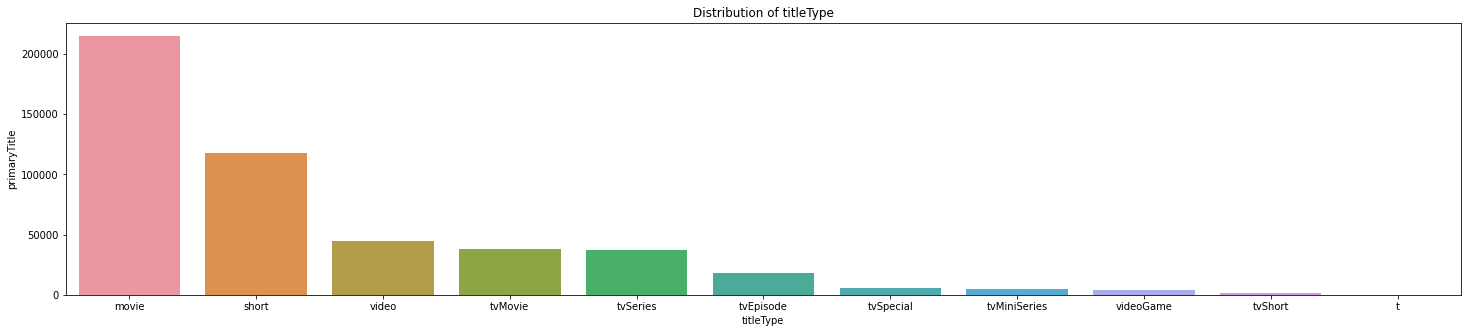

In [5]:
key = 'titleType'
tmp = data[[key,'primaryTitle']].groupby(key).count().reset_index().sort_values('primaryTitle',ascending=False)

plt.figure(figsize=(25,5))
sns.barplot(data=tmp, x=tmp[key], y=tmp['primaryTitle'])
plt.title(f'Distribution of {key}')
plt.show()

## Distribuição de Genêro

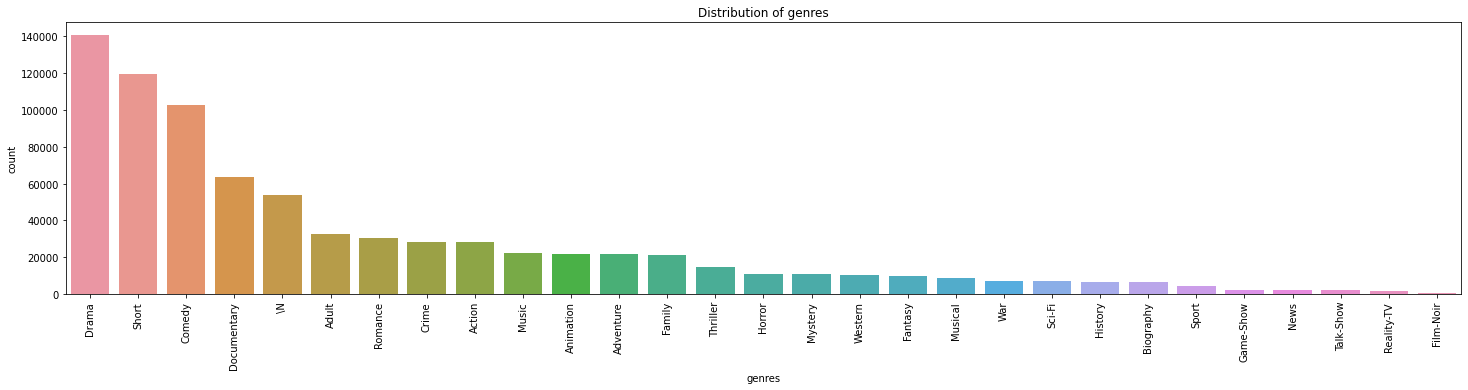

In [6]:
genres = data['genres'].dropna()
genres_list = [str(genres_str).split(',') for genres_str in genres.unique().tolist()]
genres_list = [genres.strip() for genres in list(set(sum(genres_list,[])))]

tmp = data[['primaryTitle','genres']]
for genres in genres_list:
    tmp[genres] = tmp['genres'].apply(lambda x:1 if genres in str(x) else 0)
tmp = tmp[genres_list].sum().reset_index().sort_values(0,ascending=False)
tmp.columns = ['genres','count']

plt.figure(figsize=(25,5))
sns.barplot(data=tmp,x='genres',y='count')
plt.title(f'Distribution of genres')
plt.xticks(rotation=90)
plt.show()

# Explorando uma nuvem de palavras que irá representar os gêneros mais recorrentes dos filmes

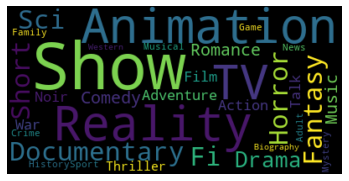

In [20]:
df_genres = data['genres'].dropna()
genres_list = [str(genres_str).split(',') for genres_str in df_genres.unique().tolist()]
genres_list = [genres.strip() for genres in list(set(sum(genres_list,[])))]
genres_list.remove("\\N")
text = ""
for g in genres_list:
  text = text + " " + g
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Gráfico de Dispersão Explorando o inicio e a data de inicio e fim


In [21]:
df_dates = data[['startYear',	'endYear']].dropna()
df_dates['startYear'].replace(to_replace="\\N", value='', inplace=True)
df_dates['endYear'].replace(to_replace="\\N", value='', inplace=True)
df_dates.tail()


,startYear,endYear
487173,2003,
487174,2001,
487175,2003,
487176,2002,
487177,2002,


# Matrix Plot - Para explorar valores não preenchidos, o gráfico é uniforme pois não existe correlação de valores nulos e vazios


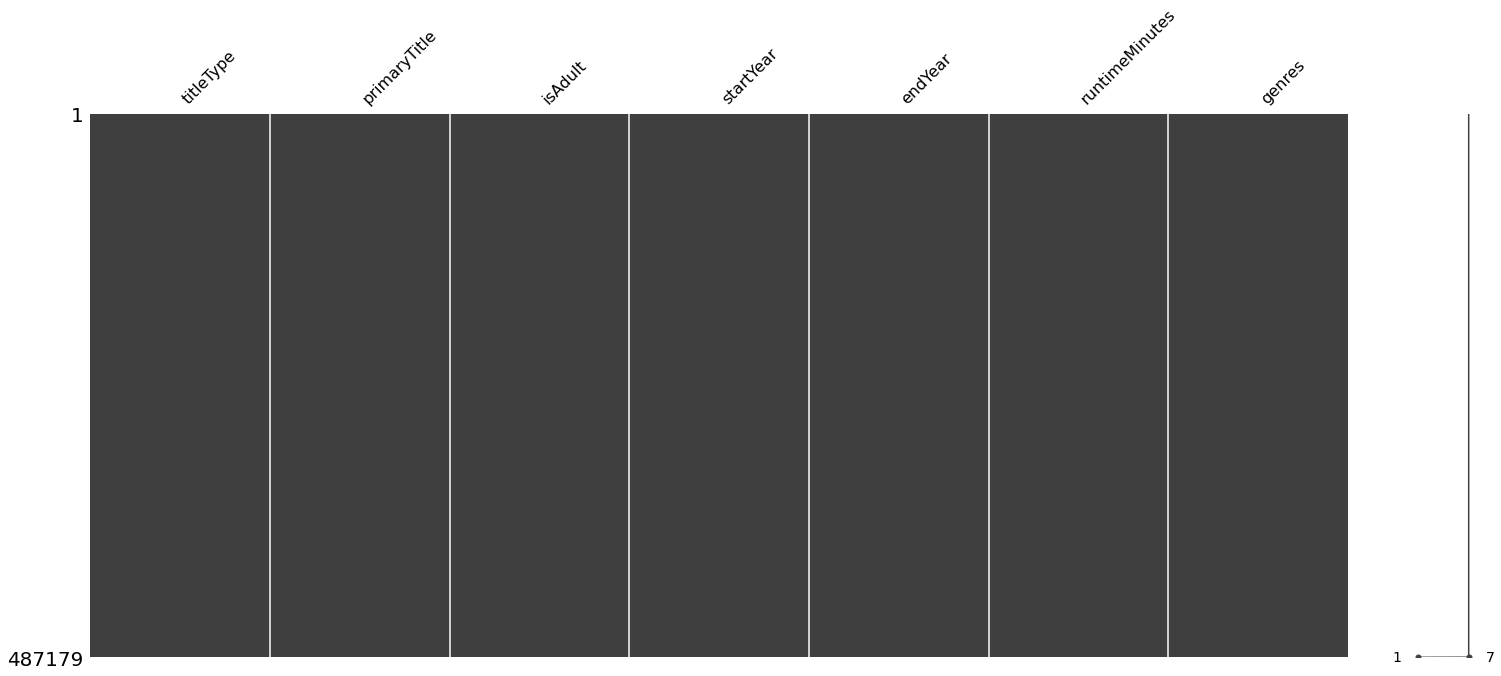

In [22]:
msno.matrix(data)

# Heatmap - Usado para identificar se existe uma relação na presença de valores nulos entre cada uma das colunas. Como a base de dados foi tratada o gráfico é  uniforme 



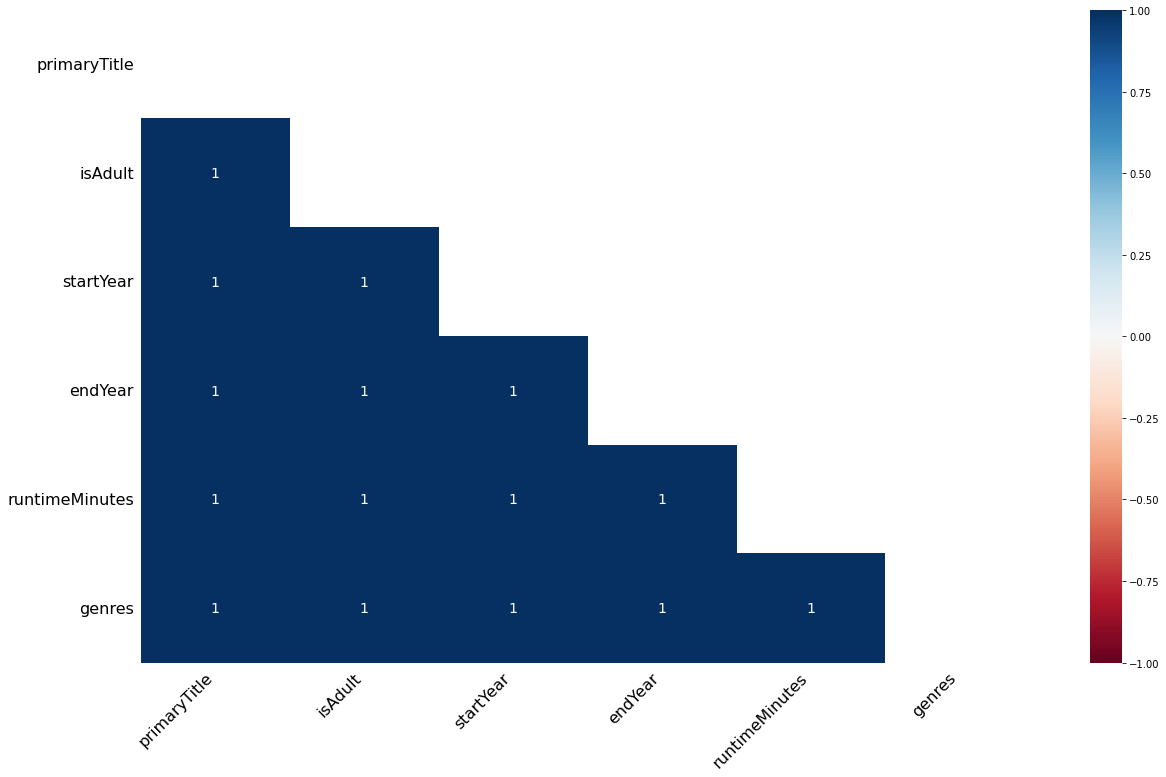

In [23]:
msno.heatmap(data)

# Nesse gráfico de dispersão podemos ver a relação do tempo de duração dos filmes no decorrer do tempo, como é mostrado no gráfico abaixo podemos notar que os filmes vão ficando com maior duração durante os anos.

In [24]:
df_correlacao_ano_tempo = data[['startYear', 'runtimeMinutes','titleType']].dropna()
# removendo valores com \N
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['runtimeMinutes'] == '\\N'].index, inplace = True)
# removendo anos com \N
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['startYear'] == '\\N'].index, inplace = True)
# removendo todos os valores que nao sejam filmes
df_correlacao_ano_tempo.drop(df_correlacao_ano_tempo[df_correlacao_ano_tempo['titleType'] != 'movie'].index, inplace = True)
# transformando os valores das colunas de ano e tempo de duração em inteiros para ser possivel agrupar
df_correlacao_ano_tempo['startYear'] = df_correlacao_ano_tempo['startYear'].astype(int)
df_correlacao_ano_tempo['runtimeMinutes'] = df_correlacao_ano_tempo['runtimeMinutes'].astype(int)
# agrupando a data e criando uma média do tempo de duração
df_correlacao_ano_tempo = df_correlacao_ano_tempo.groupby(['startYear'])['runtimeMinutes'].mean().reset_index()
# plotando o gráfico de dispersão 
fig=px.scatter(df_correlacao_ano_tempo, x = 'startYear', opacity=0.9, y = 'runtimeMinutes', log_x = True, width = 800)
fig.update_layout(title = 'Tempo de Duração X Ano de Início dos Filmes')
fig.update_xaxes(title = 'Tempo de Duração')
fig.update_yaxes(title = 'Ano de Inicio')
fig.show()
